# 时间序列的移位操作

Pandas 对象的移位方法`shift()` 可以把数据向前或向后移动，移位操作并不改变索引。对于时间序列数据，移位操作是指将日期按时间向前或向后移动。本节通过实例来介绍时间序列的移位操作。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## `shift()`的使用语法

`shift()`的使用语法为：
```pyhton
s.shift(periods=1, freq=None, axis=0)
df.shift(periods=1, freq=None, axis=0)
```
主要参数
- `period=1`,需要移动的周期数，可以使用正或负整数，缺省为向前移动一位
- `freq=None`，时间序列的频率
- `axis=0`, 0表示行索引，1表示列索引


例如下面创建一个序列对象，并继续向前与向后移位：

In [2]:
ser = pd.Series(np.arange(6))
ser

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int32

下面语句把序列向前或向后移动。注意：在进行移位时，在序列的其实位置或结束位置需要引入缺失值：

In [3]:
# 向前移动
ser.shift(2)

0    NaN
1    NaN
2    0.0
3    1.0
4    2.0
5    3.0
dtype: float64

In [4]:
# 向后移动
ser.shift(-2)

0    2.0
1    3.0
2    4.0
3    5.0
4    NaN
5    NaN
dtype: float64

对于时间序列数据，如果不使用`freq`参数，其结果与上面移位操作没什么区别：

In [5]:
dates = pd.to_datetime(['2018-01-01', '2018-01-02', '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-08'])
ser = pd.Series(np.arange(6), index=dates)
ser

2018-01-01    0
2018-01-02    1
2018-01-04    2
2018-01-05    3
2018-01-06    4
2018-01-08    5
dtype: int32

In [6]:
# 向前移动
ser.shift(2)

2018-01-01    NaN
2018-01-02    NaN
2018-01-04    0.0
2018-01-05    1.0
2018-01-06    2.0
2018-01-08    3.0
dtype: float64

如果使用`freq`参数，则会移动时间戳索引，而不是改变数据：

In [7]:
ser.shift(2, freq='D')

2018-01-03    0
2018-01-04    1
2018-01-06    2
2018-01-07    3
2018-01-08    4
2018-01-10    5
dtype: int32

可以传入其它频率，例如向前移动3个小时：

In [8]:
ser.shift(3, freq='60T')

2018-01-01 03:00:00    0
2018-01-02 03:00:00    1
2018-01-04 03:00:00    2
2018-01-05 03:00:00    3
2018-01-06 03:00:00    4
2018-01-08 03:00:00    5
dtype: int32

## 其它移位操作

可以使用`shift`方法来计算时间序列的前后差值，以及百分比变化。可以用如下代码实现：
```python
ts - ts.shift(1)
ts / ts.shift(1) - 1
```

不过，Pandas已经提供了类似这样的移位操作：
- `s.diff()`，求序列前后差值
- `s.pct_change()`，求序列前后百分比变化

In [9]:
# 求序列差值
ser.diff(2)

2018-01-01    NaN
2018-01-02    NaN
2018-01-04    2.0
2018-01-05    2.0
2018-01-06    2.0
2018-01-08    2.0
dtype: float64

In [10]:
# 求序列百分比变化
ser.pct_change(-1)

2018-01-01   -1.000000
2018-01-02   -0.500000
2018-01-04   -0.333333
2018-01-05   -0.250000
2018-01-06   -0.200000
2018-01-08         NaN
dtype: float64

## 实例练习

与上节一样，使用一个股票的交易数据集，首先导入股票数据文件：

In [11]:
import os
import random

stockcodes = ['300137', '300059', '601288', '600019', '000651'] 
stockcode = random.choice(stockcodes)
csvfile = os.path.join('..', 'data', 'stocks', '{}_lday.csv'.format(stockcode))
stockcode, csvfile

('300137', '..\\data\\stocks\\300137_lday.csv')

In [12]:
# 解析`date`行，并设置为索引
stockdata = pd.read_csv(csvfile, parse_dates=['date'])
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
date      747 non-null datetime64[ns]
open      747 non-null float64
close     747 non-null float64
high      747 non-null float64
low       747 non-null float64
volume    747 non-null float64
code      747 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 40.9 KB


对于一个股票，以收盘价买入，第二天再以收盘价卖出，二者百分比即使收益率，下面来计算收益率，也就是收盘价百分比变化：

In [13]:
# 收盘价百分比变化
stockdata['gain'] = stockdata['close'].pct_change()

下面绘制收益率的分布：

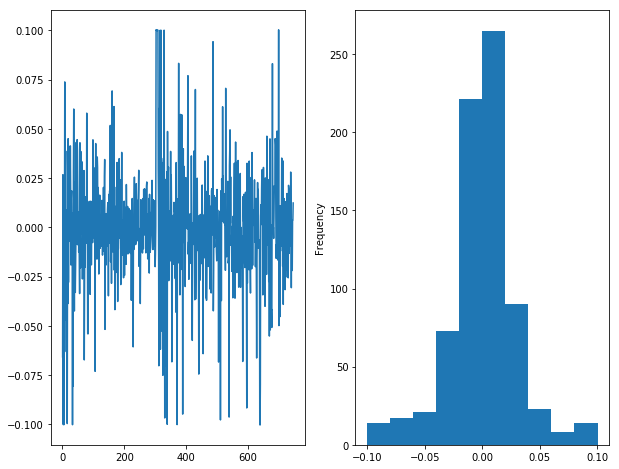

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
stockdata['gain'].plot()
plt.subplot(1, 2, 2)
stockdata['gain'].plot('hist')